
Step 1. [Download history price and clean data](/notebooks/forex/hawkeye/1_download.ipynb)

Step 2. [Use monte carlo simulate each stock's movement for 10000 times](/notebooks/forex/hawkeye/2_process.ipynb)

**Step 3. Apply some heuristic rules to give stock recommendation**

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import sys

sys.path.append('/opt/hawkeye')
from asx import *

this_week = 20190705
last_week = 20190628
path = f'/opt/hawkeye/data/{this_week}/result.csv'
last_path = f'/opt/hawkeye/data/{last_week}/result.csv'
matplotlib.rcParams['figure.figsize'] = (16, 6)


def week_return_avg(df):
    return round(
        df['week_return'].dropna().sum() / len(df['week_return'].dropna()), 4)


df = pd.read_csv(path,
                 usecols=[
                     'code', 'last_date', 'start price', 'sim_mean',
                     'sim_diff', 'VaR 99%', 'VaR 99% Percent', 'volume_mean',
                     'return_mean', 'return_sigma'
                 ],
                 index_col='code')
last_df = pd.read_csv(last_path,
                      usecols=[
                          'code', 'last_date', 'start price', 'sim_mean',
                          'sim_diff', 'VaR 99%', 'VaR 99% Percent',
                          'volume_mean', 'return_mean', 'return_sigma'
                      ],
                      index_col='code')

print(f'Total stock number = {len(df)}')

# remove bottom volume and bottom price
# volume_threshold = df['volume_mean'].quantile(0.1)
# df = df[(df['volume_mean'] > volume_threshold) & (df['start price'] > 0.05)]

# calculate return & risk rank
df['return'] = round(df['sim_diff'] / df['start price'] * 100, 3)
df['return_rank'] = round(df['return'].rank(pct=True) * 100, 3)
df['risk_rank'] = round(df['VaR 99% Percent'].rank(pct=True) * 100, 3)
df['volume_rank'] = round(df['volume_mean'].rank(pct=True) * 100, 3)
df['rank'] = df['return_rank'] - df['risk_rank']
# last week performance
df['last_return'] = round(last_df['sim_diff'] / last_df['start price'] * 100,
                          3)
df['return_increase'] = df['return'] - df['last_return']
df['return_increase_rank'] = round(df['return_increase'].rank(pct=True) * 100,
                                   3)
df['week_return'] = round(
    (df['start price'] - last_df['start price']) / df['start price'] * 100, 3)

# drop used columns
df.drop(columns=[
    'sim_diff', 'sim_mean', 'VaR 99%', 'return_increase'
],
        inplace=True)  # 'VaR 99% Percent','volume_mean'

print(f'Total stock number after bottom volume & price removed = {len(df)}')
print('Price 70%% pricetile = %s' % df['start price'].quantile(0.7))
print('Sim return 90%% percentile = %s' % df['return'].quantile(0.9))

df.drop(['QPR', 'MMJ'], inplace=True)
df.sort_values(by='return', ascending=False).head(20)

Total stock number = 1861
Total stock number after bottom volume & price removed = 1861
Price 70% pricetile = 0.82
Sim return 90% percentile = 1.343


,last_date,start price,VaR 99% Percent,volume_mean,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,,,,
CLZ,2019-07-05 00:00:00,0.0015,49.0572,5.268728e+06,0.037879,0.312774,7.867,99.893,99.678,95.809,0.215,7.290,94.704,33.333
NGE,2019-07-04 00:00:00,0.5900,44.6635,4.540816e+02,0.034703,0.271190,7.351,99.839,99.570,3.493,0.269,7.129,79.254,1.695
OCC,2019-07-05 00:00:00,0.4850,57.5992,3.731105e+06,0.035308,0.366646,6.870,99.785,99.893,92.853,-0.108,8.074,0.549,-5.155
R3D,2019-07-05 00:00:00,0.0380,37.9396,1.115184e+03,0.033617,0.227610,6.549,99.731,98.925,3.976,0.806,6.791,11.526,0.000
HCO,2019-07-05 00:00:00,0.0490,56.7945,3.304459e+05,0.029417,0.355350,6.258,99.678,99.839,56.368,-0.161,5.804,91.603,8.163
AUP,2019-07-04 00:00:00,1.7500,50.1484,1.600899e+03,0.032442,0.299709,6.043,99.624,99.731,4.675,-0.107,4.385,99.451,0.000
PCL,2019-07-05 00:00:00,0.0015,46.7168,4.913854e+06,0.025926,0.283725,5.475,99.570,99.624,95.056,-0.054,5.193,83.370,-33.333
ZER,2019-07-05 00:00:00,0.3500,38.3610,3.706939e+02,0.026434,0.223620,5.272,99.516,98.979,3.385,0.537,5.674,5.818,-1.429
NET,2019-07-05 00:00:00,0.2200,15.3403,4.076825e+06,0.026035,0.093807,5.250,99.463,79.527,93.444,19.936,4.343,97.750,25.000


## Last week review

In [2]:
selection = ['CHC', 'MFG', 'MGR', 'TLS', 'DDR', 'ASX', 'MVF', 'DTL', 'CKF', 'ASB', 'EML', 'GMG', 'APE', 'ABP', 'AD8', 'CNI', 'APA', 'RIO', 'TCL', 'MND']
last_week_df = df[df.index.isin(selection)]
last_week_df.sort_values(by='return', ascending=False).head(10)

,last_date,start price,VaR 99% Percent,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,,,
EML,2019-07-05 00:00:00,2.930,4.4547,0.007613,0.026745,1.488,91.402,19.882,73.133,71.520,1.504,39.078,-1.024
AD8,2019-07-05 00:00:00,7.980,4.5876,0.007363,0.027326,1.441,91.026,21.064,49.060,69.962,1.443,41.905,-0.125
MFG,2019-07-05 00:00:00,55.350,2.7707,0.006836,0.018131,1.364,90.220,9.618,68.726,80.602,1.227,70.911,7.859
DDR,2019-07-05 00:00:00,5.260,4.8742,0.006035,0.026676,1.164,87.910,22.300,46.265,65.610,1.193,35.730,-2.281
ASB,2019-07-05 00:00:00,3.540,2.9529,0.005057,0.017454,0.998,84.713,10.854,80.817,73.859,0.963,52.470,3.672
MVF,2019-07-05 00:00:00,1.390,3.0622,0.004431,0.017543,0.850,81.623,11.392,62.601,70.231,0.885,34.769,-0.360
APE,2019-07-05 00:00:00,9.460,4.1521,0.004081,0.022181,0.797,80.494,17.894,27.673,62.600,0.975,16.026,-3.594
CNI,2019-07-05 00:00:00,1.835,2.5760,0.003419,0.014622,0.691,77.646,8.221,68.350,69.425,0.708,38.858,3.815
CHC,2019-07-05 00:00:00,11.520,2.2169,0.003310,0.012637,0.633,75.873,6.233,83.503,69.640,0.540,64.160,5.990


In [3]:
week_return = round(sum(last_week_df['week_return'])/len(selection), 3)
win_rate = round(len(last_week_df[last_week_df['week_return'] >= 0]) / len(selection), 3)
print('Last week average return:', week_return, ' , win rate:', win_rate)

Last week average return: 2.571  , win rate: 0.75


## Signle performance review

In [4]:
def inspect(code):
    print(f'http://h.luotao.net/prediction/{this_week}/{code}_line.png')
    print(f'http://h.luotao.net/media/{this_week}/pic/{code}.png')
    
    return df[df.index==code]

In [5]:
inspect('MCX')

http://h.luotao.net/prediction/20190705/MCX_line.png
http://h.luotao.net/media/20190705/pic/MCX.png


,last_date,start price,VaR 99% Percent,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,,,
MCX,2019-07-05 00:00:00,0.02,13.5078,0.001762,0.064167,0.347,63.675,72.703,4.944,-9.028,1.521,0.604,-135.0


# Return & Risk Rank

In [6]:
top_df = df.sort_values(by='rank', ascending=False).head(20)
week_return = round(sum(top_df['week_return'].dropna())/len(top_df), 3)
print('Top rank last week average return:', week_return)
top_df

Top rank last week average return: 3.465


,last_date,start price,VaR 99% Percent,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,,,
MFG,2019-07-05 00:00:00,55.350,2.7707,0.006836,0.018131,1.364,90.220,9.618,68.726,80.602,1.227,70.911,7.859
TML,2019-07-05 00:00:00,0.054,2.3753,0.004492,0.014496,0.890,82.644,7.200,10.532,75.444,0.710,75.357,5.556
ASB,2019-07-05 00:00:00,3.540,2.9529,0.005057,0.017454,0.998,84.713,10.854,80.817,73.859,0.963,52.470,3.672
PNV,2019-07-05 00:00:00,1.710,4.6448,0.009500,0.027388,1.841,93.874,21.333,82.805,72.541,1.755,63.008,9.942
EML,2019-07-05 00:00:00,2.930,4.4547,0.007613,0.026745,1.488,91.402,19.882,73.133,71.520,1.504,39.078,-1.024
MVF,2019-07-05 00:00:00,1.390,3.0622,0.004431,0.017543,0.850,81.623,11.392,62.601,70.231,0.885,34.769,-0.360
AD8,2019-07-05 00:00:00,7.980,4.5876,0.007363,0.027326,1.441,91.026,21.064,49.060,69.962,1.443,41.905,-0.125
JIN,2019-07-05 00:00:00,20.150,4.9587,0.008843,0.030000,1.721,92.800,23.106,58.624,69.694,1.956,12.020,0.000
CHC,2019-07-05 00:00:00,11.520,2.2169,0.003310,0.012637,0.633,75.873,6.233,83.503,69.640,0.540,64.160,5.990


In [7]:
print(list(top_df.index))

['MFG', 'TML', 'ASB', 'PNV', 'EML', 'MVF', 'AD8', 'JIN', 'CHC', 'CNI', 'GMG', 'ASX', 'MGR', 'CSR', 'AMA', 'TCL', 'MP1', 'REA', 'DDR', 'PME']


## All Scatter

Max VaR 99% is 57.5992
Max return is 7.867


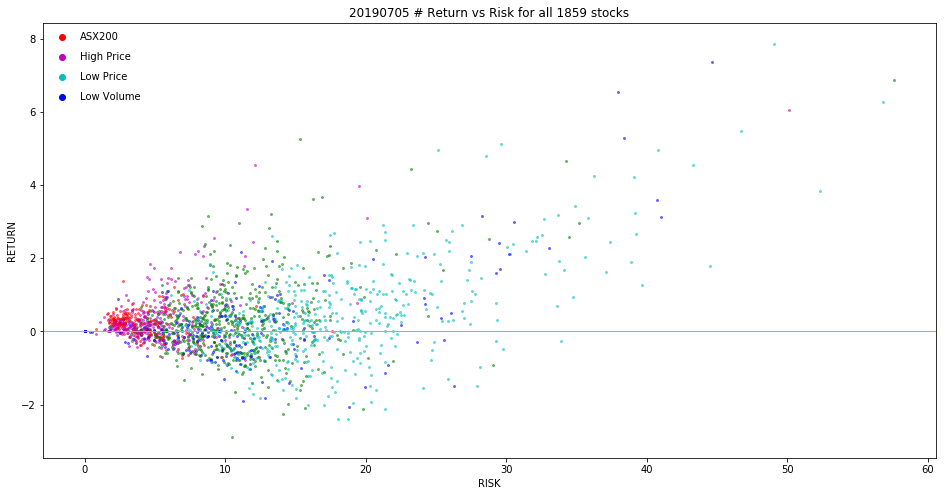

In [28]:
plt.figure(figsize=(16, 8))

# price_percentile=df['start price'].quantile(0.2)
# print(f'Price 10% percentile = {price_percentile}')
low_price = 0.05
print('Max VaR 99%% is %s' % df['VaR 99% Percent'].max())
print('Max return is %s' % df['return'].max())

for i in range(len(df)):
    code = df.iloc[i].name
    return_rank = df.iloc[i]['return']
    risk_rank = df.iloc[i]['VaR 99% Percent']
    volume_rank = df.iloc[i]['volume_rank']
    c = 'g'  # one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
    if code in asx_200_list:
        c = 'r'
    elif df.iloc[i]['start price'] > 1:
        c = 'm'
    elif df.iloc[i]['volume_rank'] < 20:
        c = 'b'
    elif df.iloc[i]['start price'] < low_price:
        c = 'c'
    plt.scatter(risk_rank, return_rank, alpha=0.5, c=c, s=4)

plt.scatter([], [], c='r', label='ASX200')
plt.scatter([], [], c='m', label='High Price')
plt.scatter([], [], c='c', label='Low Price')
plt.scatter([], [], c='b', label='Low Volume')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

plt.axhline(y=0, color='y', linestyle='-', linewidth=1)
plt.title(f"{this_week} # Return vs Risk for all {len(df)} stocks")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

## Top absolute return & risk scatter

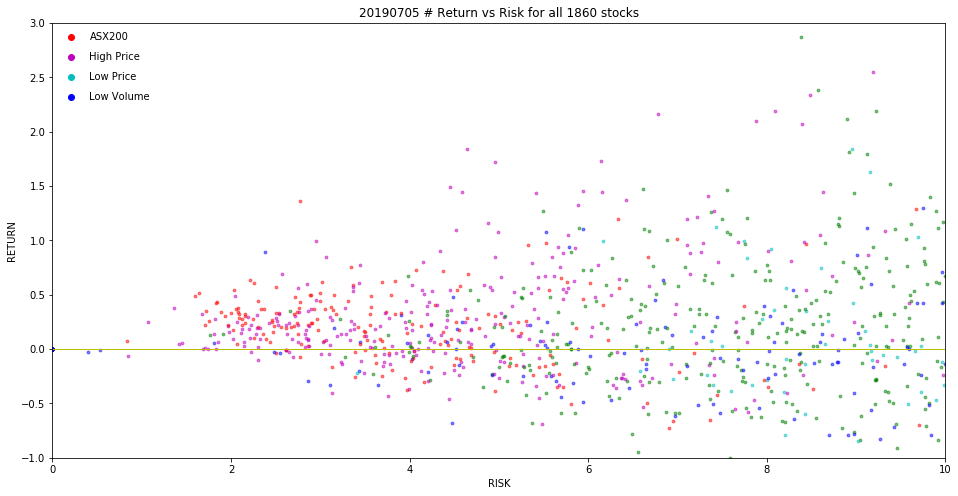

In [13]:
plt.figure(figsize=(16, 8))
plt.ylim(bottom=-1, top=3)
plt.xlim(left=0, right=10)

# price_percentile=df['start price'].quantile(0.2)
# print(f'Price 10% percentile = {price_percentile}')
low_price = 0.05
asx_200_list = get_asx_200_list()

for i in range(len(df)):
    code = df.iloc[i].name
    return_rank = df.iloc[i]['return']
    risk_rank = df.iloc[i]['VaR 99% Percent']
    volume_rank = df.iloc[i]['volume_rank']
    c = 'g'  # one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
    if code in asx_200_list:
        c = 'r'
    elif df.iloc[i]['start price'] > 1:
        c = 'm'
    elif df.iloc[i]['volume_rank'] < 20:
        c = 'b'
    elif df.iloc[i]['start price'] < low_price:
        c = 'c'
    plt.scatter(risk_rank, return_rank, alpha=0.5, c=c, s=8)

plt.scatter([], [], c='r', label='ASX200')
plt.scatter([], [], c='m', label='High Price')
plt.scatter([], [], c='c', label='Low Price')
plt.scatter([], [], c='b', label='Low Volume')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

plt.axhline(y=0, color='y', linestyle='-', linewidth=1)
plt.title(f"{this_week} # Return vs Risk for all {len(df)} stocks")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

## ASX 200 scatter

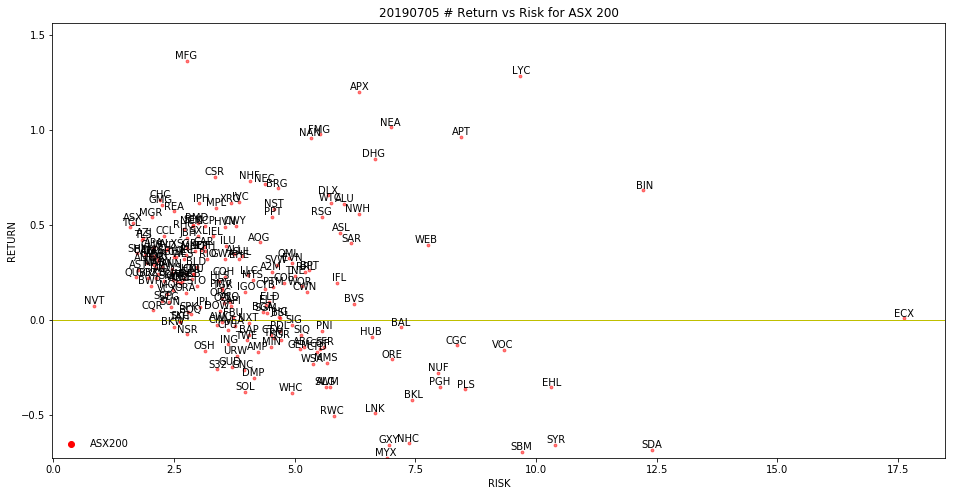

In [30]:
plt.figure(figsize=(16, 8))
asx_200_list = get_asx_200_list()
asx_200 = df[df.index.isin(asx_200_list)].sort_values(by='return',
                                                      ascending=False)

plt.ylim(bottom=asx_200['return'].min(), top=asx_200['return'].max()+0.2)
# plt.xlim(left=0, right=10)

for i in range(len(asx_200)):
    code = asx_200.iloc[i].name
    return_rank = asx_200.iloc[i]['return']
    risk_rank = asx_200.iloc[i]['VaR 99% Percent']
    volume_rank = asx_200.iloc[i]['volume_rank']
    c = 'g'  # one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
    if code in asx_200_list:
        c = 'r'
        plt.scatter(risk_rank, return_rank, alpha=0.5, c=c, s=8)
        plt.annotate(code,
                     xy=(risk_rank, return_rank),
                     xytext=(10, 0),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.scatter([], [], c='r', label='ASX200')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

plt.axhline(y=0, color='y', linestyle='-', linewidth=1)
plt.title(f"{this_week} # Return vs Risk for ASX 200")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

## Top percent rank scatter with volume

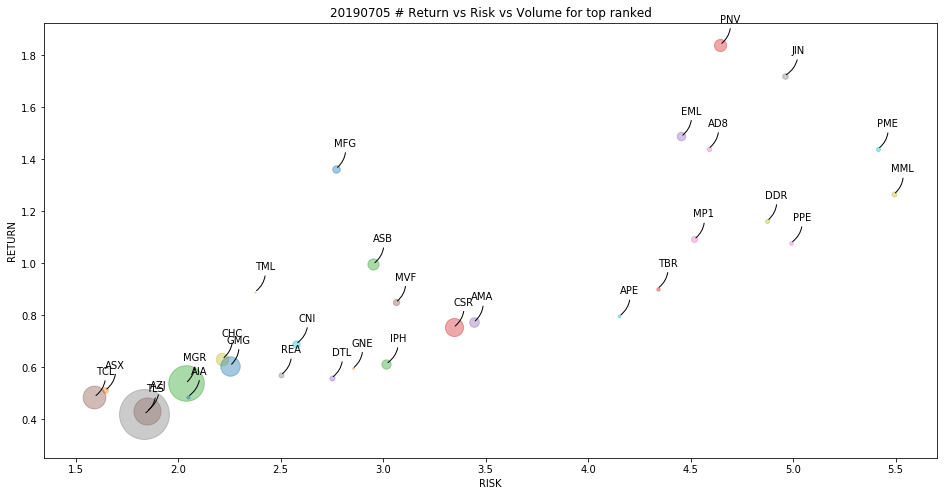

In [170]:
plt.figure(figsize=(16, 8))

top_df = df.sort_values(by='rank', ascending=False).head(30)
# plt.ylim(bottom=60, top=100)
# plt.xlim(left=0, right=26)

min_vol = top_df['volume_mean'].min()
max_vol = top_df['volume_mean'].max()
vol_factor = 2500 / max_vol

for i in range(len(top_df)):
    code = top_df.iloc[i].name
    return_rank = top_df.iloc[i]['return']
    risk_rank = top_df.iloc[i]['VaR 99% Percent']
    volume_rank = top_df.iloc[i]['volume_rank']
    volume_mean = top_df.iloc[i]['volume_mean']
    size = volume_mean * vol_factor
    size = 1 if size < 1 else size
    plt.scatter(risk_rank, return_rank, s=size, alpha=0.4)
    plt.annotate(code,
                 xy=(risk_rank, return_rank),
                 xytext=(20, 20),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 arrowprops=dict(arrowstyle='-',
                                 connectionstyle='arc3,rad=-0.3'))

plt.title(f"{this_week} # Return vs Risk vs Volume for top ranked")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

In [147]:
df0517 = pd.read_csv('/opt/hawkeye/data/20190517/result.csv',
                     usecols=[
                         'code', 'last_date', 'start price', 'sim_mean',
                         'sim_diff', 'VaR 99%', 'VaR 99% Percent',
                         'volume_mean', 'return_mean', 'return_sigma'
                     ],
                     index_col='code')
codes = set(df0517.index).intersection(set(df.index))
df0517 = df0517[df0517.index.isin(codes)]
price_change = (df[df.index.isin(codes)]['start price'] -
                df0517['start price']) / df0517['start price']
df0517['month_return'] = round(price_change * 100, 3)
df0517['month_return_rank'] = df0517['month_return'].rank(ascending=False)

mfg = df0517[df0517.index == 'MFG']['month_return']
print(str(mfg))
df0517[df0517.index == 'MFG']
mfg_better_df = df0517[df0517['month_return'] > 23.4]
mfg_better_df['month_risk_rank'] = mfg_better_df['VaR 99% Percent'].rank(
    ascending=False)

mfg_better_df=mfg_better_df.sort_values(by='month_return', ascending=False)

code
MFG    23.494
Name: month_return, dtype: float64


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


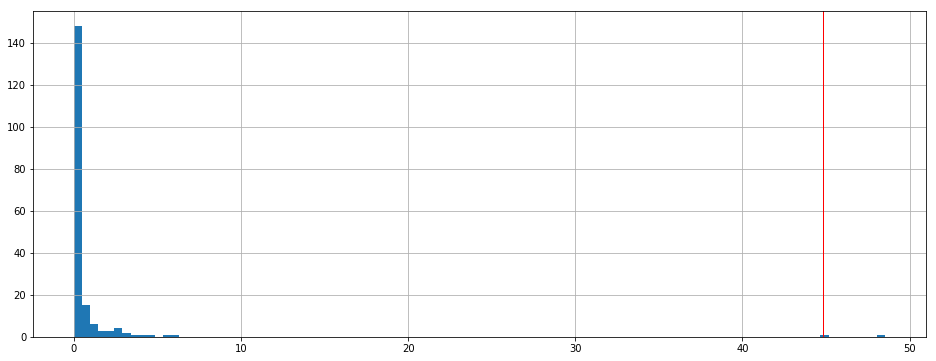

In [177]:
mfg_better_df['start price'].hist(bins=100)
plt.axvline(x=mfg_better_df.iloc[-1]['start price'], linewidth=1, color='r')


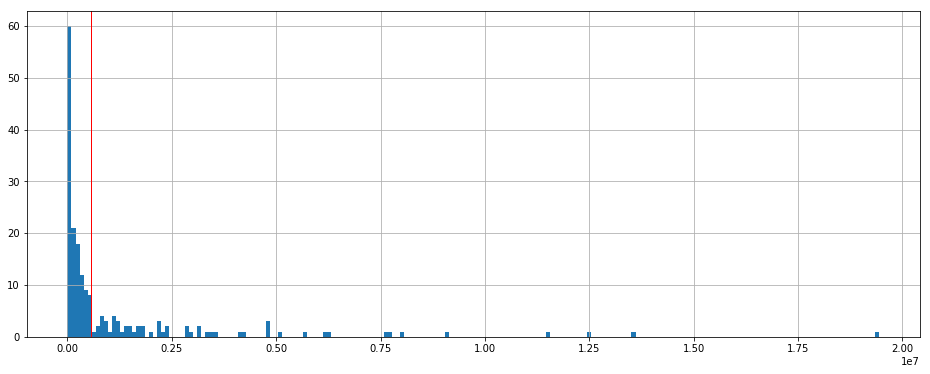

In [178]:
mfg_better_df['volume_mean'].hist(bins=200)
plt.axvline(x=mfg_better_df.iloc[-1]['volume_mean'], linewidth=1, color='r')

In [173]:
print('In the performance better than MFG, price > 0.1 is %s/%s' % (len(
    mfg_better_df[mfg_better_df['start price'] > 0.1]), len(mfg_better_df)))
print('In the performance better than MFG, price > 0.5 is %s/%s' % (len(
    mfg_better_df[mfg_better_df['start price'] > 0.5]), len(mfg_better_df)))
print(
    'In the performance better than MFG, price > 1 is %s/%s' %
    (len(mfg_better_df[mfg_better_df['start price'] > 1]), len(mfg_better_df)))
print('In the performance better than MFG, MFG\'s risk ranked %s/%s' %
      (int(mfg_better_df.iloc[-1]['month_risk_rank']), len(mfg_better_df)))

# mfg_better_df[mfg_better_df['start price']>0.5]

In the performance better than MFG, price > 0.1 is 77/188
In the performance better than MFG, price > 0.5 is 38/188
In the performance better than MFG, price > 1 is 24/188
In the performance better than MFG, MFG's risk ranked 184/188


In [179]:
print('Risk is lower than MFG')
mfg_better_df[mfg_better_df['month_risk_rank']>184]

Risk is lower than MFG


,last_date,start price,sim_mean,sim_diff,VaR 99%,VaR 99% Percent,volume_mean,return_mean,return_sigma,month_return,month_return_rank,month_risk_rank
code,,,,,,,,,,,,
CHR,2019-05-17,4.100,4.10,-0.004064,0.0997,2.4315,1.849071e+03,-0.000543,0.010457,73.171,32.0,187.0
NHF,2019-05-17,5.890,5.91,0.024947,0.1697,2.8808,8.738196e+05,0.002037,0.014403,36.672,112.0,185.0
MPL,2019-05-17,2.880,2.89,0.009837,0.0688,2.3898,8.046589e+06,0.001787,0.012241,27.431,159.0,188.0
CNI,2019-05-17,1.445,1.45,0.004475,0.0381,2.6372,4.978307e+05,0.001453,0.013496,26.990,162.0,186.0


In [174]:
print('MFG volume is %s' % mfg_better_df.iloc[-1]['volume_mean'])
print('Volume is higher than MFG')
mfg_better_df[mfg_better_df['volume_mean'] > mfg_better_df.iloc[-1]
              ['volume_mean']].sort_values(by='volume_mean', ascending=False).head(5)

MFG volume is 560383.7272727273
Volume is higher than MFG


,last_date,start price,sim_mean,sim_diff,VaR 99%,VaR 99% Percent,volume_mean,return_mean,return_sigma,month_return,month_return_rank,month_risk_rank
code,,,,,,,,,,,,
EN1,2019-05-10,0.034,0.04,0.001064,0.0132,38.7711,1.943988e+07,0.016271,0.217536,29.412,147.0,5.0
EM1,2019-05-10,0.020,0.02,0.000664,0.0043,21.3670,1.358636e+07,0.016666,0.116522,35.000,120.0,16.0
LKO,2019-05-10,0.001,0.00,0.000029,0.0004,35.5518,1.250126e+07,0.015152,0.195022,50.000,75.0,6.0
CLI,2019-05-10,0.033,0.03,0.000819,0.0056,16.9846,1.148078e+07,0.012366,0.089634,69.697,37.0,36.0
88E,2019-05-16,0.013,0.01,0.000012,0.0019,14.7758,9.096956e+06,0.000947,0.069461,38.462,106.0,52.0
